<a href="https://colab.research.google.com/github/zidisw/Dicoding/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Zid_Irsyadin_Sartono_Wijaogy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [267]:
file_path = '/content/drive/My Drive/Submission_Dicoding/Airplane_Crashes_and_Fatalities_Since_1908.csv'
data = pd.read_csv(file_path)
data.head()

,index,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **1. Memahami Struktur Data**

In [268]:
# Tinjau jumlah baris dan kolom
print(f"Jumlah baris dan kolom: {data.shape}")

Jumlah baris dan kolom: (5268, 14)


In [269]:
# Tinjau jenis data di setiap kolom
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         5268 non-null   int64  
 1   Date          5268 non-null   object 
 2   Time          3049 non-null   object 
 3   Location      5248 non-null   object 
 4   Operator      5250 non-null   object 
 5   Flight #      1069 non-null   object 
 6   Route         3561 non-null   object 
 7   Type          5241 non-null   object 
 8   Registration  4933 non-null   object 
 9   cn/In         4040 non-null   object 
 10  Aboard        5246 non-null   float64
 11  Fatalities    5256 non-null   float64
 12  Ground        5246 non-null   float64
 13  Summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB
None


In [270]:
# Memeriksa duplikasi data
print(f"Jumlah duplikat: {data.duplicated().sum()}")

Jumlah duplikat: 0


### **2. Identifikasi dan visualisasi data yang hilang**

In [271]:
# Jumlah data yang hilang di setiap kolom
print("Jumlah data hilang di setiap kolom:")
print(data.isnull().sum())

Jumlah data hilang di setiap kolom:
index              0
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64


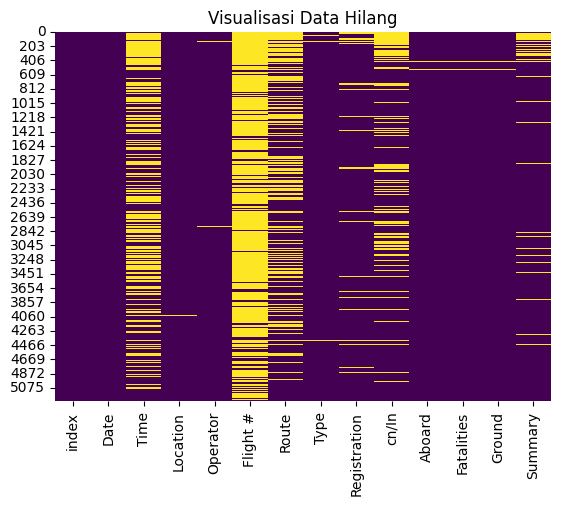

In [272]:
# Visualisasi data yang hilang
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Visualisasi Data Hilang")
plt.show()

### **3. Analisis Distribusi Variabel**


Statistik deskriptif untuk variabel numerik:
            index       Aboard   Fatalities       Ground
count  5268.00000  5246.000000  5256.000000  5246.000000
mean   2633.50000    27.554518    20.068303     1.608845
std    1520.88494    43.076711    33.199952    53.987827
min       0.00000     0.000000     0.000000     0.000000
25%    1316.75000     5.000000     3.000000     0.000000
50%    2633.50000    13.000000     9.000000     0.000000
75%    3950.25000    30.000000    23.000000     0.000000
max    5267.00000   644.000000   583.000000  2750.000000


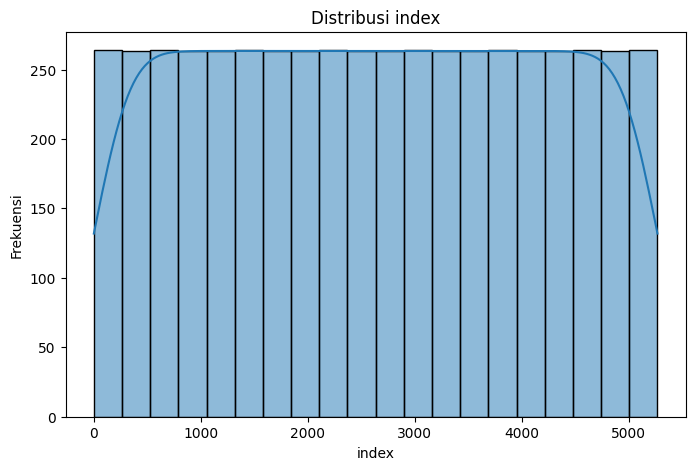

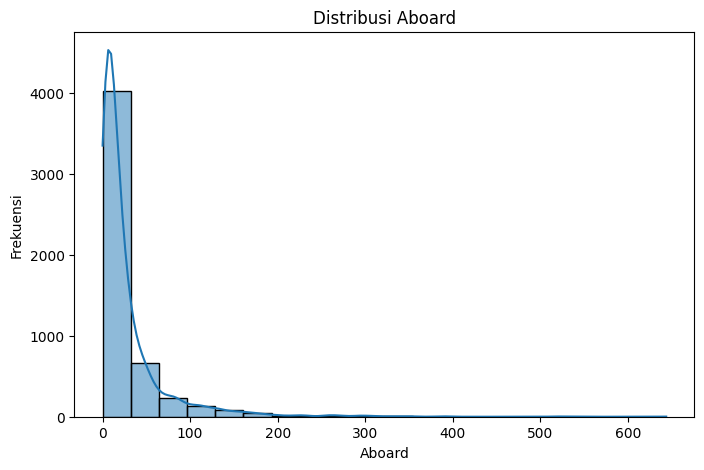

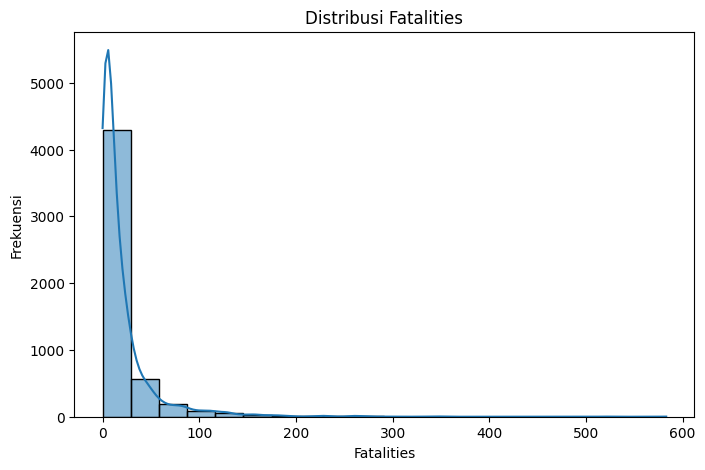

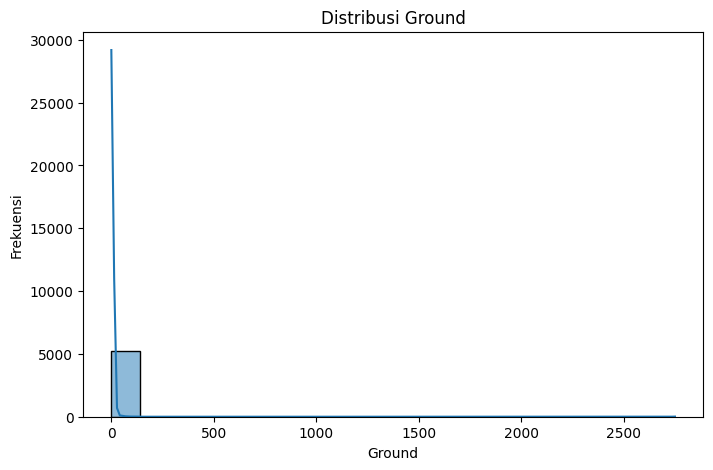

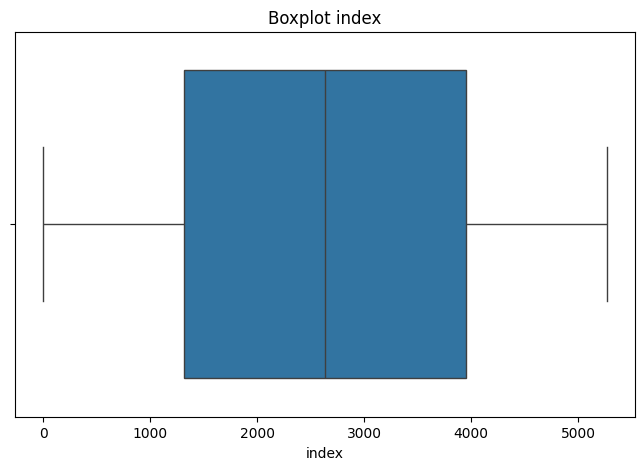

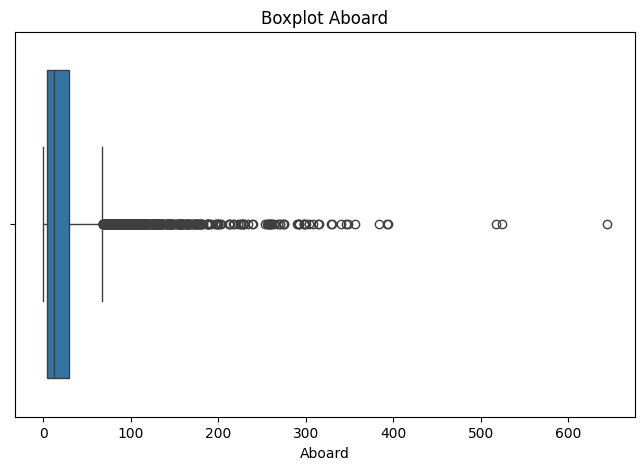

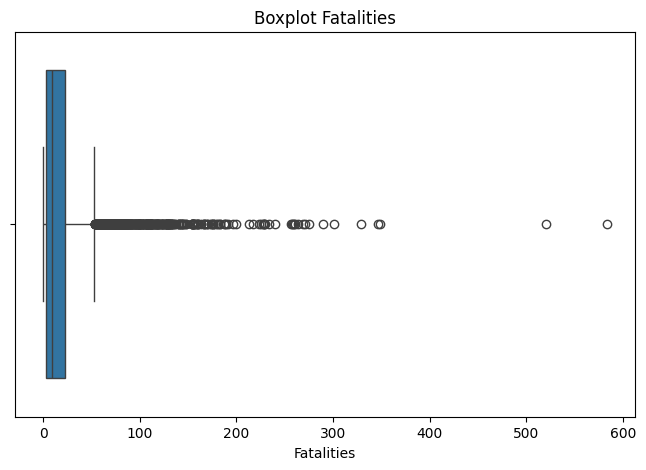

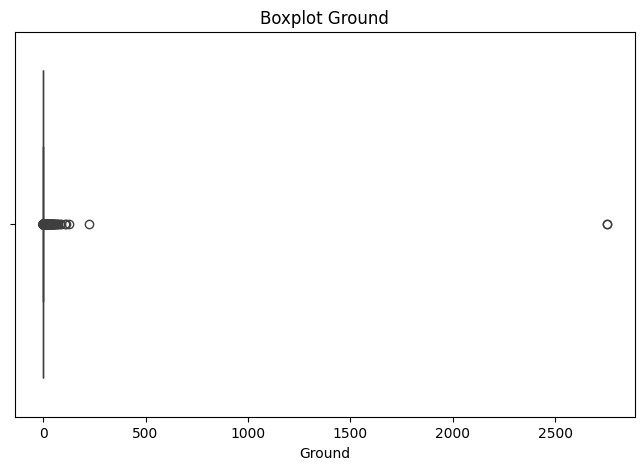

In [273]:
# Analisis statistik deskriptif variabel numerik
print("\nStatistik deskriptif untuk variabel numerik:")
print(data.describe())

# Visualisasi distribusi variabel numerik menggunakan histogram
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], bins=20, kde=True)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

# Visualisasi distribusi variabel numerik menggunakan boxplot
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot {col}")
    plt.show()


### **4. Visualisasi Data**

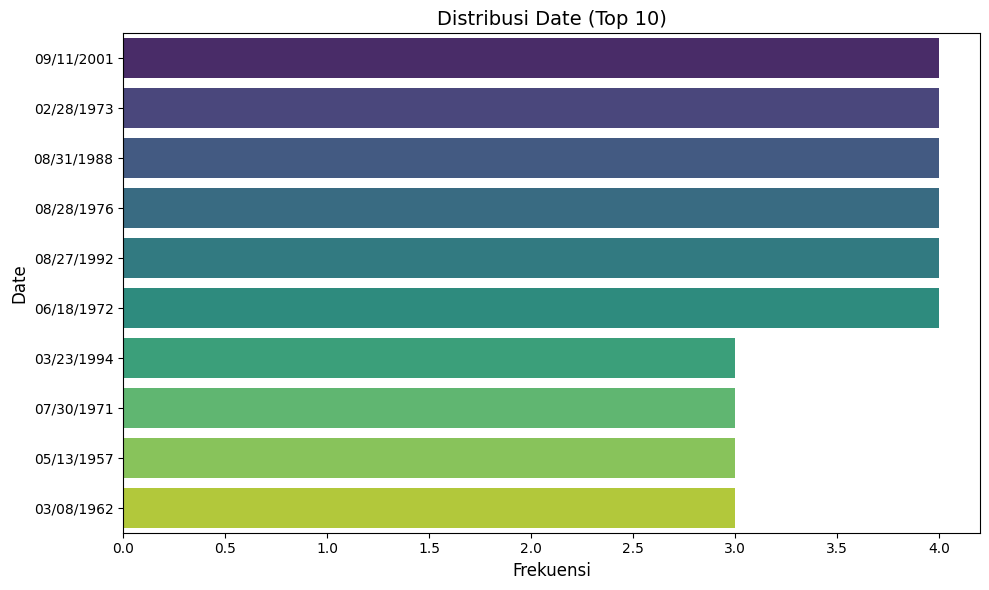

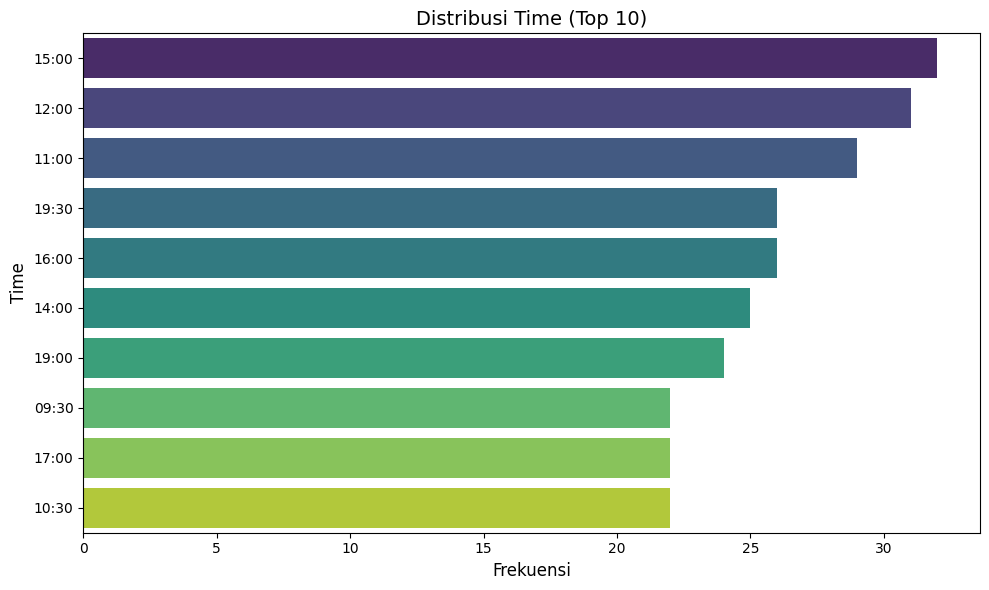

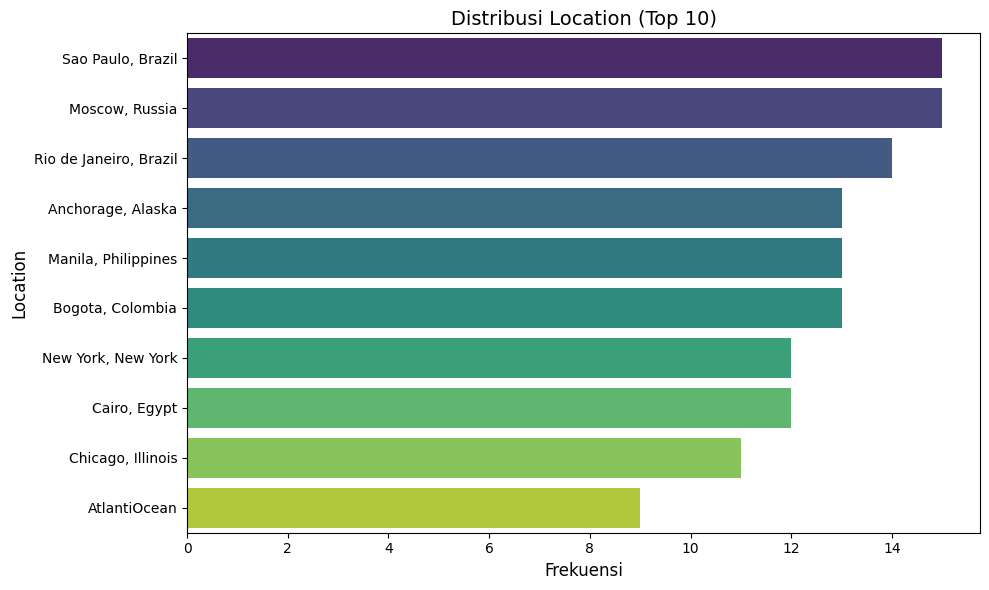

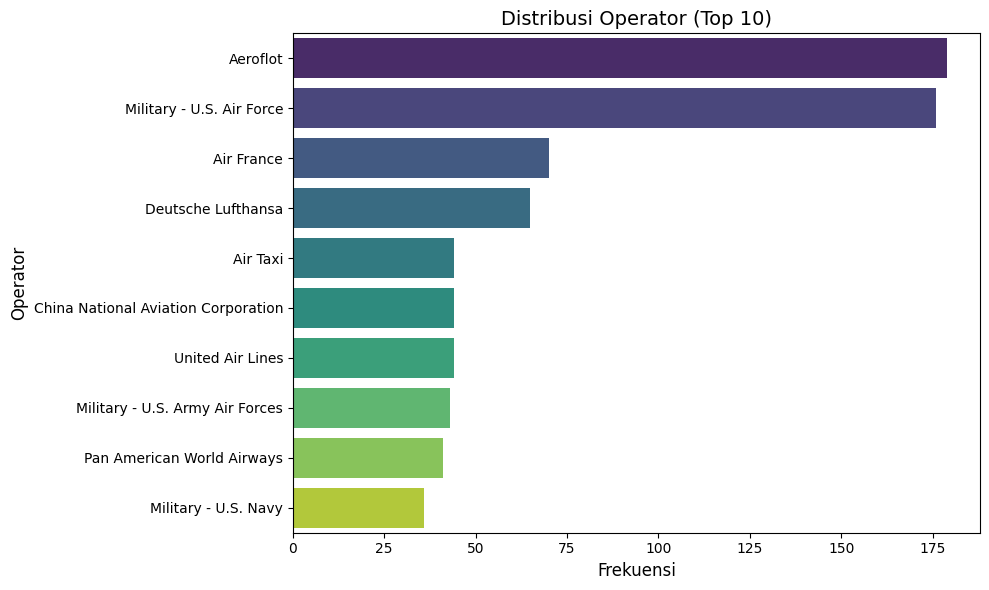

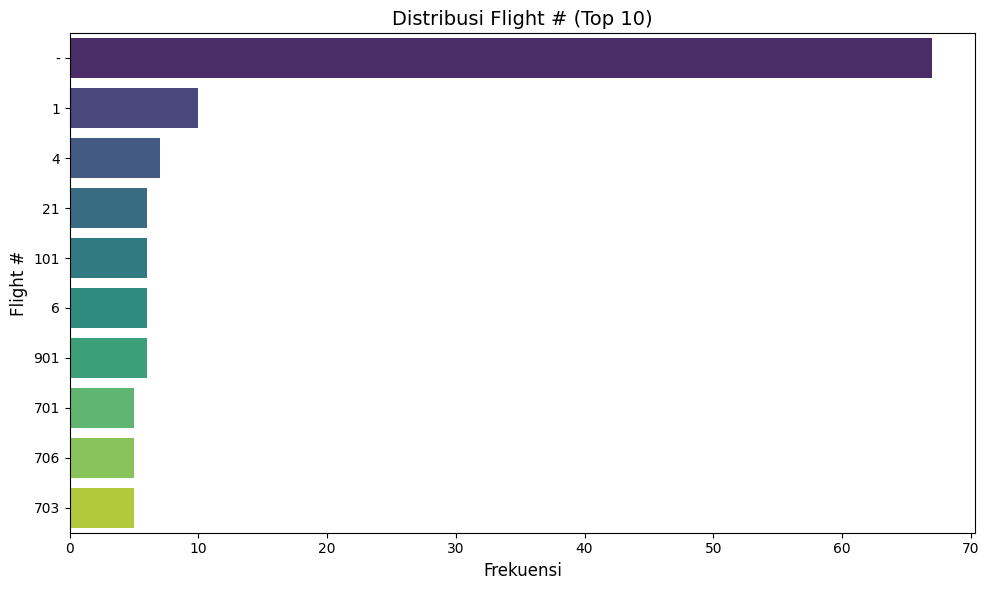

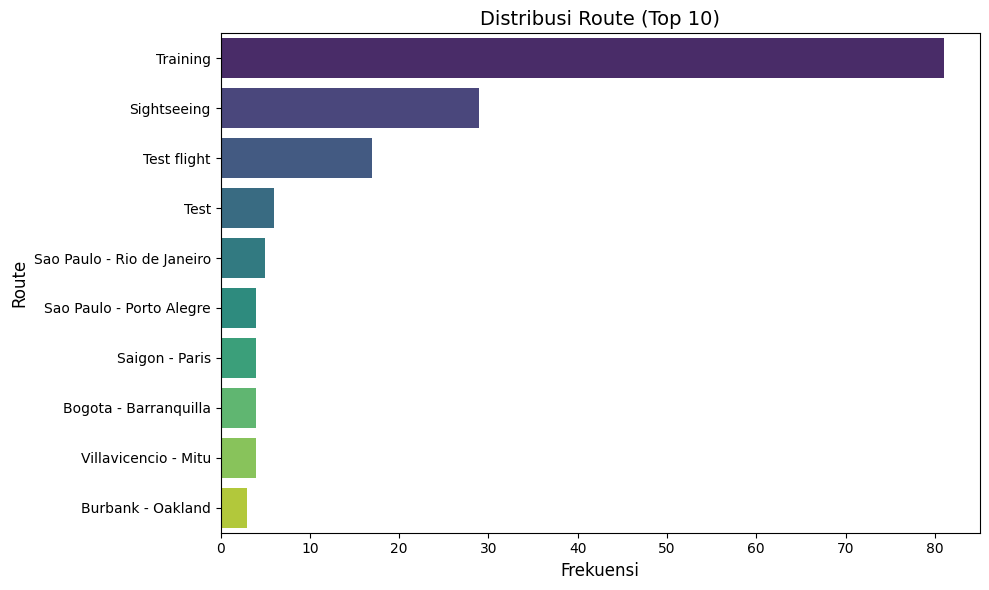

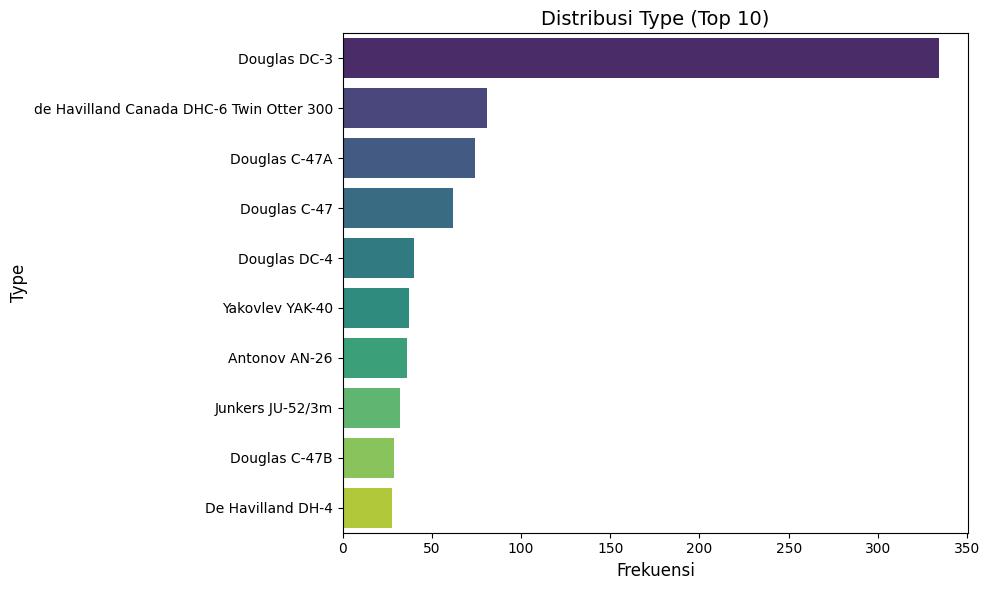

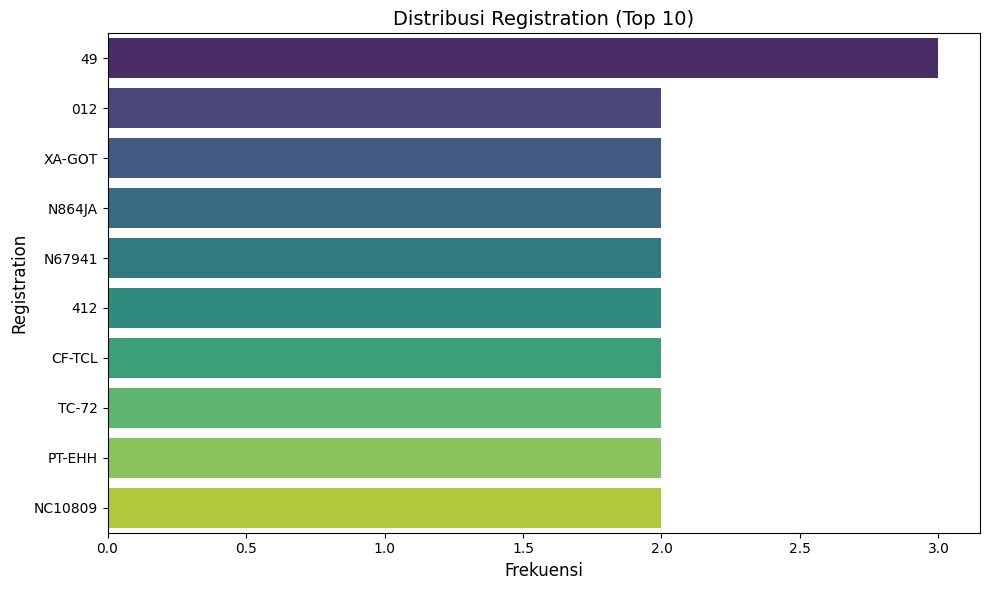

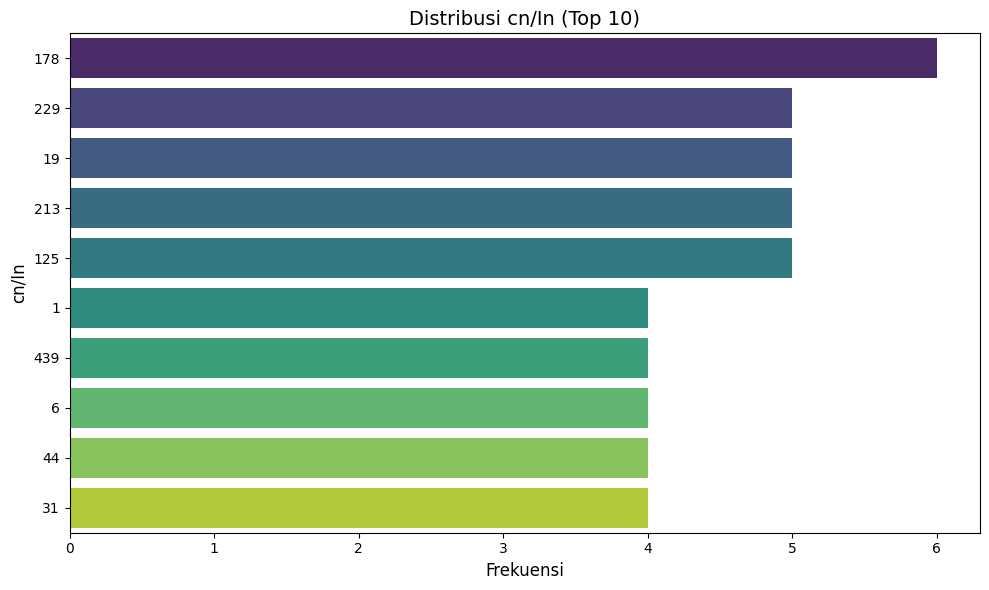

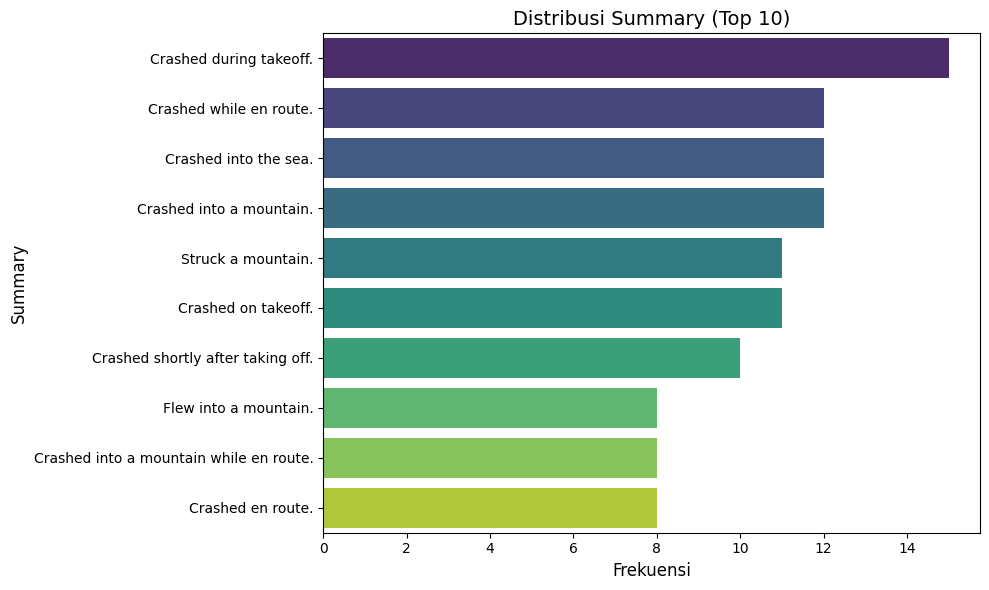

In [274]:
# Pilih kolom kategorikal
categorical_columns = data.select_dtypes(include=['object']).columns

# Iterasi untuk setiap kolom kategorikal
for col in categorical_columns:
    # Ambil 10 kategori teratas berdasarkan frekuensi
    top_categories = data[col].value_counts().head(10)

    # Buat grafik
    plt.figure(figsize=(10, 6))  # Ukuran grafik lebih besar
    sns.barplot(hue=top_categories.index, y=top_categories.index, x=top_categories.values, palette="viridis", legend=False)

    # Tambahkan judul dan label
    plt.title(f"Distribusi {col} (Top 10)", fontsize=14)
    plt.xlabel("Frekuensi", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()


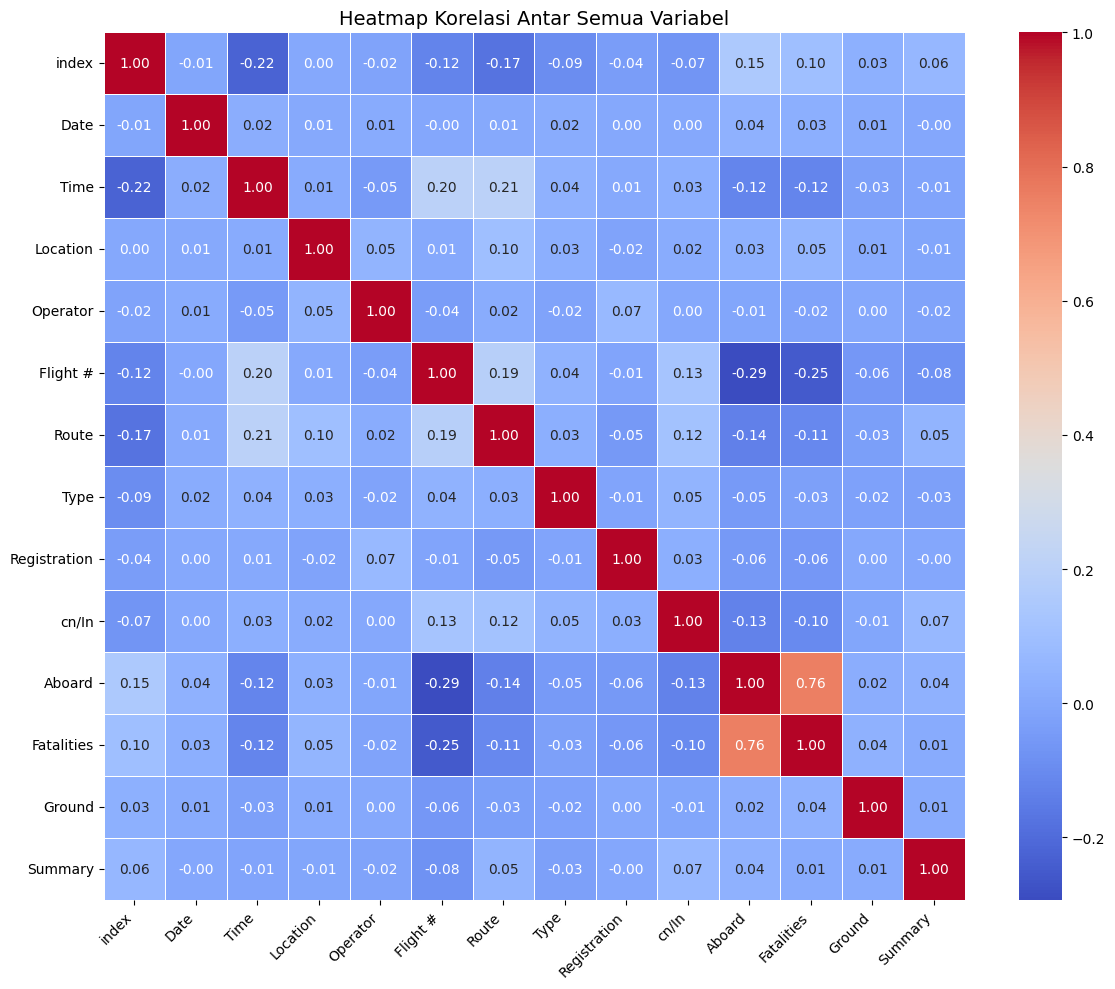

In [275]:
from sklearn.preprocessing import LabelEncoder

# Salin dataset agar tidak merusak data asli
data_encoded = data.copy()

# Encode semua kolom kategorikal
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col].astype(str))
    label_encoders[col] = le

# Hitung matriks korelasi untuk semua kolom (termasuk yang telah di-encode)
corr_matrix_all = data_encoded.corr()

# Buat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_all, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Semua Variabel", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


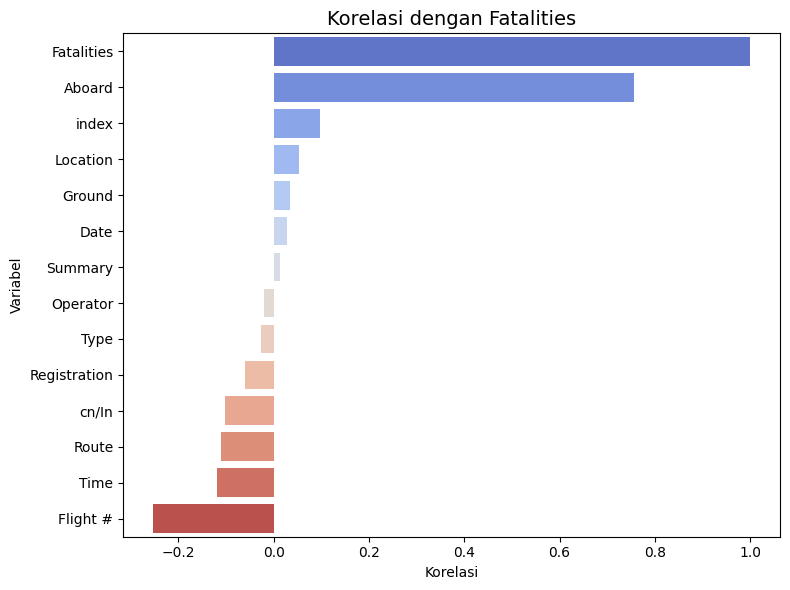

In [276]:
# Fokus pada korelasi dengan variabel 'Fatalities'
target_correlation = corr_matrix_all['Fatalities'].sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(hue=target_correlation.index, y=target_correlation.index, x=target_correlation.values, palette='coolwarm', legend=False)
plt.title("Korelasi dengan Fatalities", fontsize=14)
plt.xlabel("Korelasi")
plt.ylabel("Variabel")
plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [348]:
# Check number of rows
row_count = data.shape[0]

In [327]:
# Penanganan missing values kolom numerikal dengan Median
data_cluster = data[['Aboard', 'Fatalities', 'Ground']].copy()
data_cluster['Year'] = pd.to_datetime(data['Date'], errors='coerce').dt.year
data_cluster['Type_encoded'] = pd.factorize(data['Type'])[0]

data_cluster = data_cluster.dropna()  # Hapus baris dengan missing values

In [339]:
data_cluster.head()

,Aboard,Fatalities,Ground,Year,Type_encoded
0,2.0,1.0,0.0,1908,0
1,5.0,5.0,0.0,1912,1
2,1.0,1.0,0.0,1913,2
3,20.0,14.0,0.0,1913,3
4,30.0,30.0,0.0,1913,4


In [332]:
# Periksa jumlah data duplikat
print(f"Jumlah data duplikat: {data_cluster.duplicated().sum()}")

# Menghapus data duplikat
data_cluster = data_cluster.drop_duplicates()

Jumlah data duplikat: 0


In [333]:
data_cluster.describe()

,Aboard,Fatalities,Ground,Year,Type_encoded
count,5133.000000,5133.000000,5133.000000,5133.000000,5133.00000
mean,27.993571,20.359439,1.643483,1971.855445,1033.75414
std,43.419963,33.489316,54.578423,22.099527,656.49270
min,0.000000,0.000000,0.000000,1908.000000,-1.00000
25%,5.000000,3.000000,0.000000,1955.000000,426.00000
50%,13.000000,9.000000,0.000000,1973.000000,995.00000
75%,31.000000,23.000000,0.000000,1990.000000,1532.00000
max,644.000000,583.000000,2750.000000,2009.000000,2445.00000


In [350]:
# prompt: detect and handle outliers

# Identify outliers using the IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Example usage for the 'Fatalities' column
outliers_fatalities = detect_outliers_iqr(data_cluster, 'Fatalities')
print("Outliers in 'Fatalities':")
print(outliers_fatalities)

# Example usage for the 'Aboard' column
outliers_aboard = detect_outliers_iqr(data_cluster, 'Aboard')
print("\nOutliers in 'Aboard':")
print(outliers_aboard)

# Handling outliers (example: replacing with median)
def handle_outliers_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[column].median()
    data[column] = np.where((data[column] < lower_bound) | (data[column] > upper_bound), median, data[column])
    return data

data_cluster = handle_outliers_median(data_cluster, 'Fatalities')
data_cluster = handle_outliers_median(data_cluster, 'Aboard')

print("\nData after outlier handling:")
print(data_cluster.describe())

Outliers in 'Fatalities':
      Aboard  Fatalities  Ground  Year  Type_encoded
615     41.0        40.0     0.0  1943           347
809     39.0        39.0     0.0  1946           434
838     38.0        38.0     0.0  1947           437
868     40.0        40.0     0.0  1947           416
962     37.0        37.0     0.0  1948           505
...      ...         ...     ...   ...           ...
4558    42.0        39.0     0.0  1998          2086
4589    38.0        38.0     0.0  1998          2099
4968    37.0        37.0     0.0  2004          1135
5101    40.0        40.0     0.0  2006          2356
5124    38.0        38.0     0.0  2006          2367

[102 rows x 5 columns]

Outliers in 'Aboard':
      Aboard  Fatalities  Ground  Year  Type_encoded
59      45.0        34.0     0.0  1922            35
965     45.0        19.0     0.0  1948           507
1031    46.0        28.0     0.0  1949           474
1394    47.0        15.0     0.0  1955           654
1432    45.0        32.0  

In [336]:
# 1. Deteksi Outlier
# Fungsi untuk mendeteksi outlier berdasarkan IQR
def detect_outliers_iqr(data, threshold=1.5):
    Q1 = np.percentile(data, 25, axis=0)
    Q3 = np.percentile(data, 75, axis=0)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)
    return (data < lower_bound) | (data > upper_bound)

# Deteksi outlier di semua kolom numerik
outliers = detect_outliers_iqr(data_cluster.values)
outliers_mask = np.any(outliers, axis=1)
data_cluster = data_cluster[~outliers_mask]

# Tampilkan jumlah outlier di setiap kolom
row_count_after_outliers = data_cluster.shape[0]

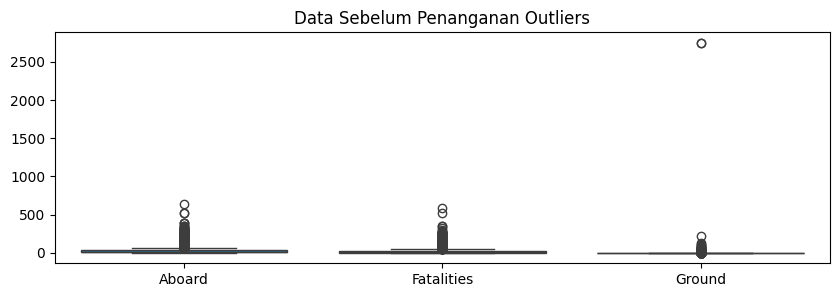

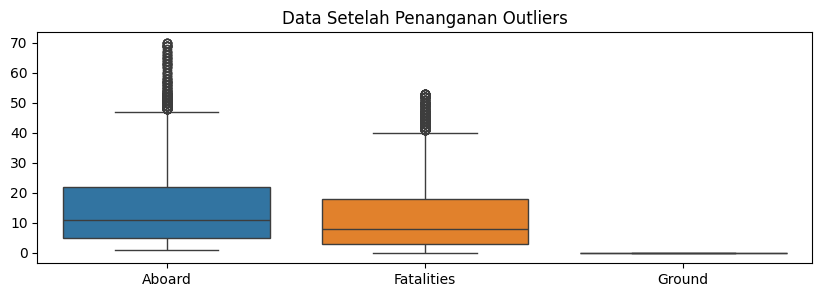

In [335]:
# Visualisasi sebelum outliers handling
plt.figure(figsize=(10, 3))
sns.boxplot(data=data[['Aboard', 'Fatalities','Ground']])
plt.title("Data Sebelum Penanganan Outliers")
plt.show()

# Visualisasi setelah outliers handling
plt.figure(figsize=(10, 3))
sns.boxplot(data_cluster[['Aboard', 'Fatalities', 'Ground']])
plt.title("Data Setelah Penanganan Outliers")
plt.show()

In [343]:
# 3. Standarisasi Data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)
# Validasi standarisasi
print("Hasil Standarisasi (StandardScaler):")
print(data_scaled)

Hasil Standarisasi (StandardScaler):
[[-1.04177513 -1.00564789  0.         -2.71610362 -1.46880855]
 [-0.76224563 -0.59152933  0.         -2.54189054 -1.46731764]
 [-1.13495163 -1.00564789  0.         -2.49833727 -1.46582673]
 ...
 [ 0.44904885  0.75435598  0.          1.68277675  2.17498123]
 [-1.13495163 -1.00564789  0.          1.68277675  0.78843274]
 [-0.01683364  0.23670778  0.          1.68277675  0.96883314]]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

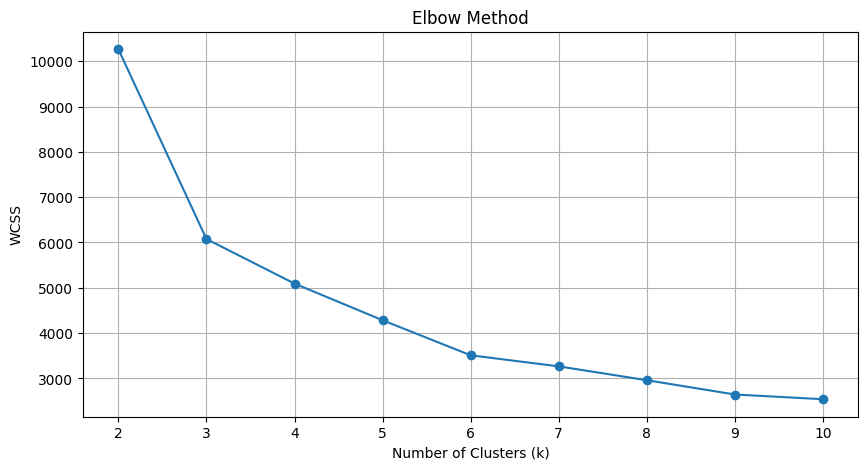

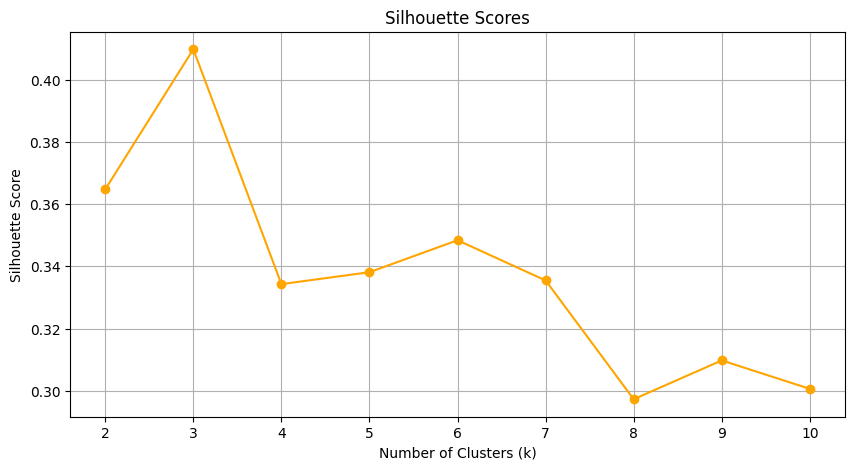

In [344]:
# Determine the optimal number of clusters using the Elbow Method and Silhouette Analysis
wcss = []
silhouette_scores = []
k_range = range(2, 11)  # Test k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(data_scaled, labels))

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

# Choose the optimal k based on the analysis
optimal_k = k_range[np.argmax(silhouette_scores)]


In [345]:
# Perform K-Means clustering with the optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(data_scaled)
clusters_optimal = kmeans_optimal.labels_


In [349]:
# Calculate Silhouette Score for the optimal k
silhouette_score_optimal = silhouette_score(data_scaled, clusters_optimal)

# Outputs:
# Assign outputs to variables to ensure all are defined
results = (row_count, row_count_after_outliers, optimal_k, silhouette_score_optimal)

# Outputs
results

(5268, 4096, 3, 0.40974264305038643)

## **K-Means Clustering**

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [322]:
# Example of how to use the optimal_k for KMeans:
# (This part is also in your code, but I'm adding comments to clarify)
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data_replaced_outliers['Cluster'] = kmeans.fit_predict(X)

# Calculate Silhouette Score for the optimal k:
silhouette_avg_optimal = silhouette_score(X, data_replaced_outliers['Cluster'])
print(f"Silhouette Score for optimal k={optimal_k}: {silhouette_avg_optimal}")

Silhouette Score for optimal k=2: 0.6763903779542685


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [323]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [324]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [325]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.